In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import glob
from matplotlib.ticker import MultipleLocator
from pynverse import inversefunc
import datetime as dt
import h5py

In [2]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [4]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

In [74]:
today = dt.date.today()
date = today.strftime("%Y%m%d")
print("d1 =", date)

d1 = 20230713


In [5]:
file = 'C:/Data/StandStatus/20230713.h5'

In [9]:
tree = h5py.File(file, 'r')

In [12]:
# 0 - handling or TPC
# 1 - handling or TPC
# 2 - left or right cylinder
# 3 - left or right cylinder
# 4 - ???
# 5 - ???
# 6 - Flow meter
# 7 - LN2 level??
# 8 - Circulation pump pressure
# 9 - cold head
# 10 - copper ring
# 11 - copper jacket
# 12 - TPC bottom
# 13 ????
# 14 ????
# 15 time? (units?) (unix time stamp??) - off by 66 years
#16-22 no clue, seems to be DAQ or electronics?

plt.plot(np.asarray(tree['PTF'][:,11]))


OSError: Can't read data (addr overflow, addr = 21070992, size = 2616, eoa = 21068944)

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def get_today():
    today = dt.date.today()
    date = today.strftime("%Y%m%d")
    return date


def get_timestamp(date = get_today()):
    formated_date = dt.datetime.strptime(date,"%Y%m%d")
    Unix_timestamp = dt.datetime.timestamp(formated_date)
    print(Unix_timestamp)


def get_xenon(data):
    LXe_p = np.max(data['PTF'][:,0]) + 14.69 #converting to PISA
    RXe_p = np.max(data['PTF'][:,1]) + 14.69 #converting to PISA

    T_room = 293 #Kelvin
    R = 8.314 #J/(mol K)
    MM_Xe = 131.293 #average molar mass of natural xenon
    V_cyl = np.pi*30*4 #in^3
    lb_inch_2_J = 0.112984825 # Conversion factor for pound inches to joules for ideal gas law

    LM_Xe = LXe_p*V_cyl*lb_inch_2_J/(R*T_room)*MM_Xe #gramns of Xenon in L cyinder
    RM_Xe = RXe_p*V_cyl*lb_inch_2_J/(R*T_room)*MM_Xe #gramns of Xenon in R cyinder

    return LM_Xe, RM_Xe

def get_temp(yesterdata,todata, component):

    if component == 'cold head': index = 9
    elif component == ' copper ring': index = 10
    elif component == 'copper jacket': index = 11
    elif component == 'TPC bottom': index = 12
    else: raise ValueError('Unrecognized component')

    start_t = 


# Using the stupidest thing I can think of as the placeholder right now. In the future could tie it into level meter, other temps, etc.
def check_cooldown(yesterdata):
    cold_head = yesterdata['PTF'][:,9]
    if (cold_head[0] > 0)*(np.any(cold_head < 0)):
        return True
    else: return False

   
if __name__ == '__main__':

    today = get_today()
    yesterday = str(int(today)-1 )

    yesterfile = 'C:/Data/StandStatus/{0}.h5'.format(yesterday)
    yesterdata = h5py.File(yesterfile,'r')
    if check_cooldown(yesterdata):
        ##code here##
        todata = 'C:/Data/StandStatus/{0}.h5'.format(today)

        # Load prvious data arrays
        previous_data = np.load('./test_stad_data.npz') # Assuming this will be a dictionary with keys like "LXe", "RXe", "Cold Head Temp" etc.

        # calculate new data
        LXe, RXe = get_xenon(todata) # Reading off the xenon pressure at the start of Liquefaction when opening valves 1 & 2
        previous_data['LXe'] = np.append(previous_data['LXe'], LXe)
        previous_data['RXe'] = np.append(previous_data['RXe'], RXe)

        CH_min, CH_rate = get_temp(yesterdata, todata, 'cold head')
        # append new data into arrays
        # save changed arrays
        # Update data plots
        # upload curves and data to git repo
    # Code here
    # Any non-cooldown nightly check we want to do (circulation pump?)

    

ValueError: NumPy boolean array indexing assignment cannot assign 121849 input values to the 121847 output values where the mask is true

In [7]:
data = h5py.File('C:/Data/StandStatus/20230713.h5', 'r')
LXe = data['PTF'][:,0]
RXe = data['PTF'][:,1]
data.file.close()

OSError: Can't read data (addr overflow, addr = 20896568, size = 184, eoa = 20896568)

In [6]:
plt.plot(LXe)

NameError: name 'LXe' is not defined

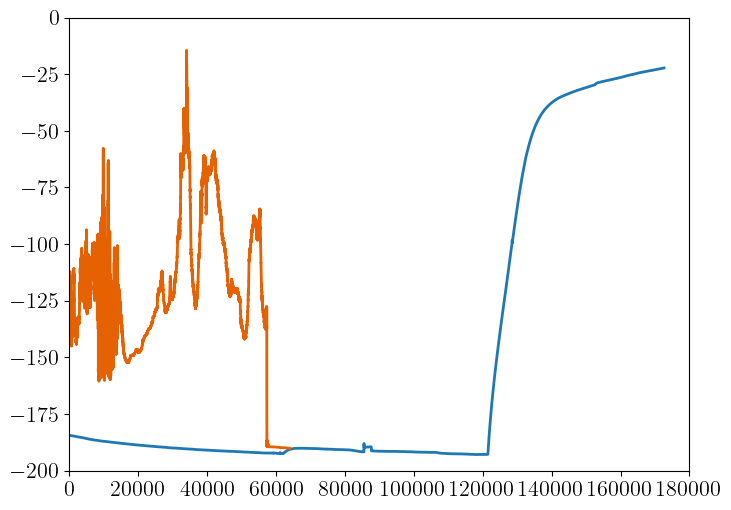

In [5]:
run1 = ['C:/Data/StandStatus/20230712.h5','C:/Data/StandStatus/20230713.h5']
run2 = ['C:/Data/StandStatus/20230725.h5','C:/Data/StandStatus/20230726.h5']


plt.figure()
for file in run1:
    CH = np.array([])
    CR = np.array([])
    CJ = np.array([])
    TB = np.array([])

    data = h5py.File(file, 'r')
    CH = np.append(CH, data['PTF'][:,9])
    #CR = np.append(CR, data['PTF'][:,10])
    #CJ = np.append(CJ, data['PTF'][:,11])
    #TB = np.append(TB, data['PTF'][:,12])

plt.plot(CH)

for file in run2:
    CH = np.array([])
    CR = np.array([])
    CJ = np.array([])
    TB = np.array([])

    data = h5py.File(file, 'r')
    CH = np.append(CH, data['PTF'][:,9])
    #CR = np.append(CR, data['PTF'][:,10])
    #CJ = np.append(CJ, data['PTF'][:,11])
    #TB = np.append(TB, data['PTF'][:,12])

plt.plot(CH)

plt.show()
    
    

In [14]:
data = h5py.File('C:/Data/StandStatus/20230712.h5', 'r')
print(data[:,9])

AttributeError: 'tuple' object has no attribute 'encode'